'Jewel-Osco'

'0.79'

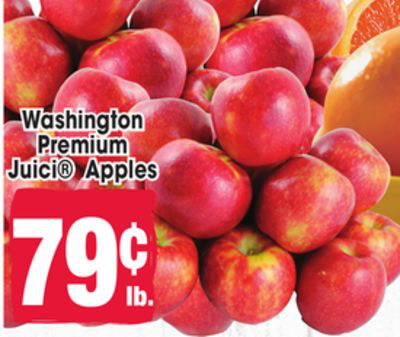

In [5]:
#Import packages
import requests
import io
import urllib.request
import flipp_extracter
from PIL import Image
from io import BytesIO
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')


# Information needed for data extraction
item_name = 'Apple'
zip_code = 60565

#results list of dictionarys of query items
Output = flipp_extracter.search(item_name, zip_code)   


def select_df(list_dics_all):
    '''
    Results a datafram of selected items reading a list of 
    dictionaries of extracted items.
    '''
    #Reading data from Output dictionary
    selected_cols = ['brand', 'merchant', 'name', 'category', 'description', 
                                           'current_price', 'price_text', 'percent_off','image_url','cutout_image_url']
    df_all_items = pd.DataFrame(columns = selected_cols) # dataframe from selected items

    list_dic_selected_items =[]  # list of dictionaries with selected item desriptions only


    for i in range(len(Output)):
        items_dict = Output[i]['item']
        selected_dict = {}

        for key in items_dict:
            if key in selected_cols:
                selected_dict[key] = items_dict[key]                   
        list_dic_selected_items.append(selected_dict)   #update list with dictinaries for each group
    df_all_items = df_all_items.append(list_dic_selected_items, True)   # append list to dataframe 
    return df_all_items

df_sel = select_df(Output)

def sort_display(df_sel):
    df_price = df_sel[df_sel['current_price'] != '']
    df_sorted = df_price.sort_values(by='current_price')
    df_sorted = df_sorted.reset_index()
    lowest_price = df_sorted['current_price'].min()

    #Lowest price item
    store_name = df_sorted['merchant'][0]
    current_price = df_sorted['current_price'][0]
    item_image = df_sorted['image_url'][0]
    #read the image
    with urllib.request.urlopen(item_image ) as url:
         ff = io.BytesIO(url.read())

    img = Image.open(ff)
    #display(store_name, current_price )
    #out_image = display(img)
    return store_name, current_price, img
display(sort_display(df_sel)[0], sort_display(df_sel)[1])
display(sort_display(df_sel)[2])